### Nigerian Music

La diversa audiencia nigeriana tiene diversos gustos musicales. Utilizando datos extraídos de Spotify, veamos un poco sobre la música popular en Nigeria. Este dataset incluye data sobre la puntuación de `danceability`,  `acousticness`, `loudness`, `speechiness`, `popularity` y `energy`. Será interesante descubrir patrones en estos datos.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./data/nigerian-songs.csv")
df.head(3)

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.110,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.101,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.110,-7.127,0.0424,130.005,4


Text(0.5, 1.0, 'Top genres')

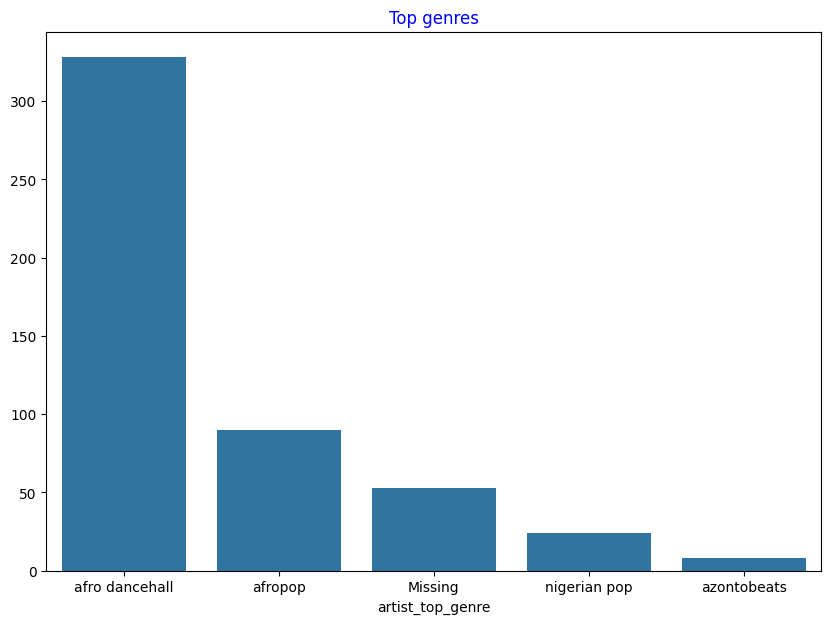

In [14]:
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.title('Top genres',color = 'blue')

Cuando el "top genre" se describe como "Missing", significa que Spotify no lo clasificó. Vamos a sacar esta categoria de nuestro dataset.

Text(0.5, 1.0, 'Top Genres without missing')

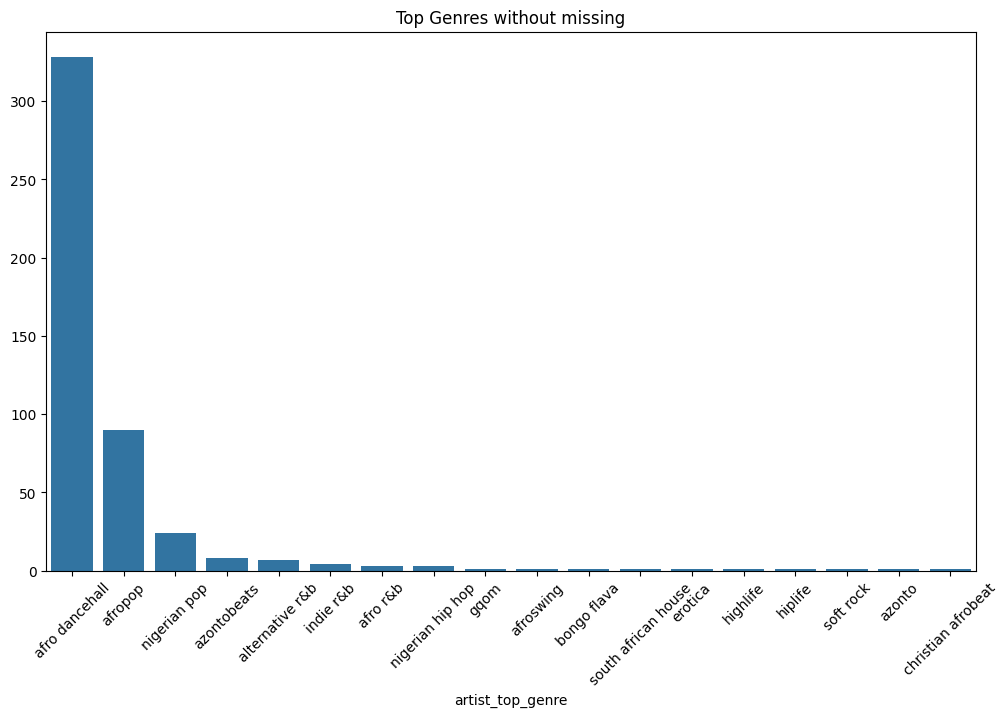

In [21]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(x=top.index, y=top.values)
plt.xticks(rotation=45)
plt.title("Top Genres without missing")

Las tres primeras categorias de generos dominan el dataset por mucho. Vamos a concentrarnos en `afro dancehall`, `afropop`, y `nigerian pop`. Además vamos a filtrar el dataset para eliminar todas las caciones que tengan popularidad 0.

Text(0.5, 1.0, 'Artist Top Genre')

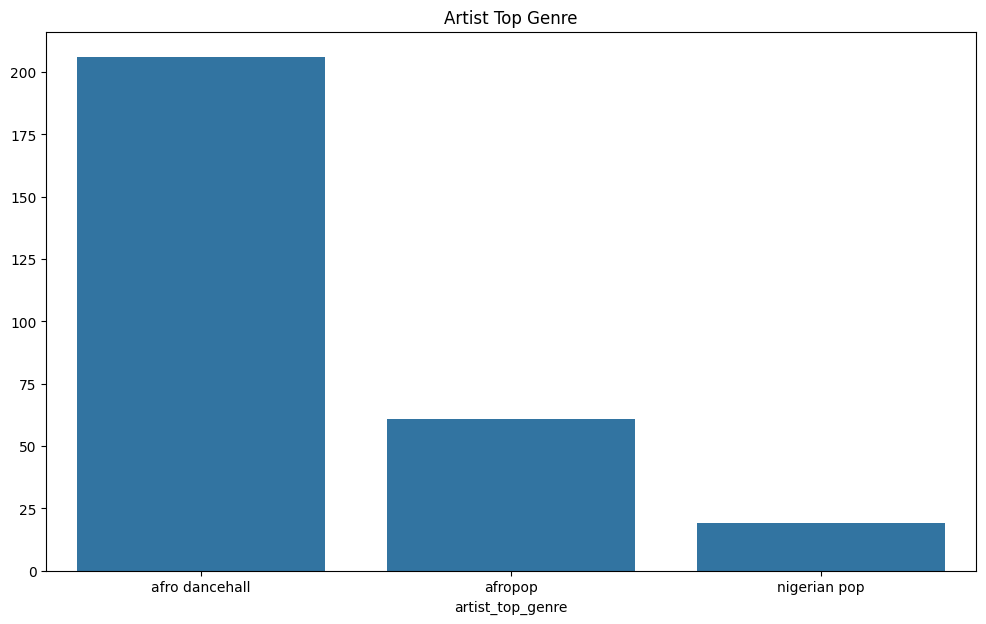

In [22]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[df['popularity'] > 0]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(x=top.index, y=top.values)
plt.title("Artist Top Genre")

Haremos un test rápido para ver si la data se correlaciona de manera fuerta en algún sentido:

<Axes: >

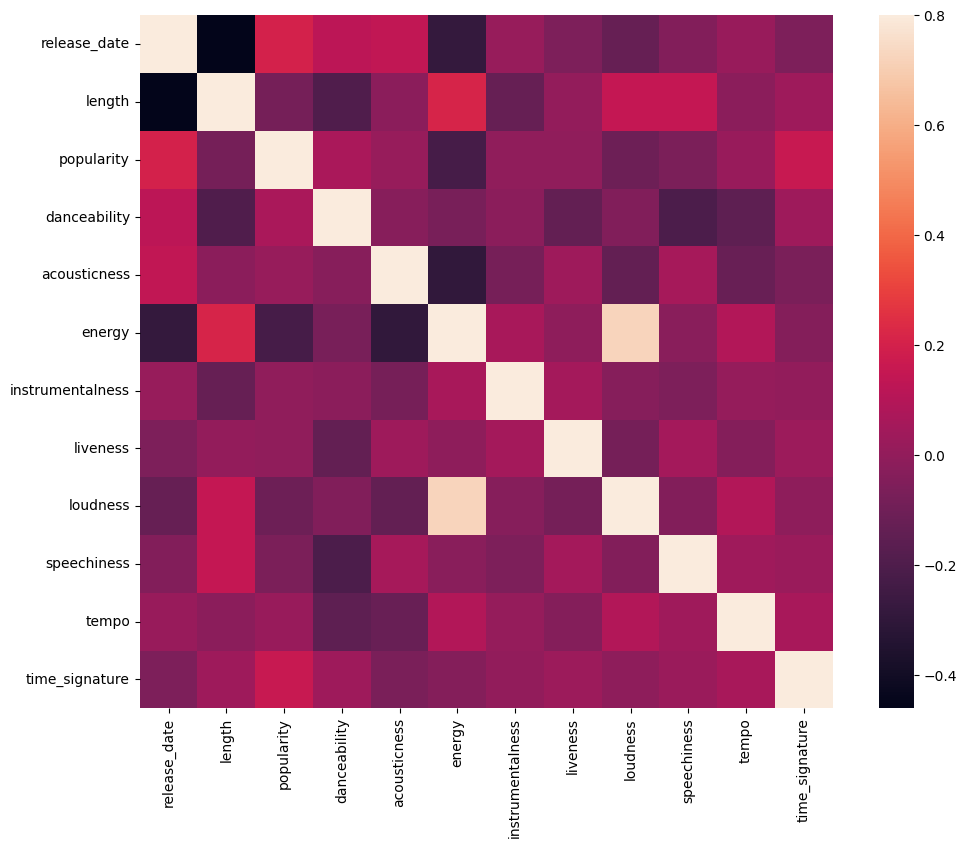

In [28]:
import numpy as np
# Eliminar las columnas no numericas en una copia para poder hacer la correlación
df_numeric = df.select_dtypes(include=[np.number])
corrmat = df_numeric.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

La única correlación fuerte es entre "energía" y "sonoridad", lo cuál no es sorprendente dado que la "loud music" es bastante energética. De lo contrario, las correlaciones son relativamente débiles. Será interesante ver qué puede hacer un algoritmo de agrupación con estos datos.

¿Hay alguna convergencia en este conjunto de datos en torno a la popularidad percibida y la bailabilidad de una canción? Un FacetGrid muestra que hay círculos concéntricos que se alinean, independientemente del género. ¿Será que los gustos nigerianos convergen en un cierto nivel de bailabilidad para este género?

✅ Try different datapoints (energy, loudness, speechiness) and more or different musical genres. What can you discover? Take a look at the df.describe() table to see the general spread of the data points.